In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
ds=pd.read_csv("train.csv")

In [42]:
ds.shape

(2000, 21)

In [43]:
x=ds.iloc[:,:-1]
y=ds.iloc[:,-1]

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [45]:
bestfeature=SelectKBest(score_func=chi2,k=20)

In [46]:
fit=bestfeature.fit(x,y)

In [47]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(20,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
7           m_dep       0.745820
1            blue       0.723232
2     clock_speed       0.648366
3        dual_sim       0.631011
19           wifi       0.422091
17        three_g       0.327643


[0.05940219 0.02076853 0.03739054 0.01926041 0.03068713 0.01721914
 0.03419472 0.03495156 0.03780379 0.03259365 0.03222036 0.05114753
 0.04634617 0.38822517 0.03358636 0.0349285  0.03266532 0.01434127
 0.02141189 0.02085578]


/home/anonymous/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


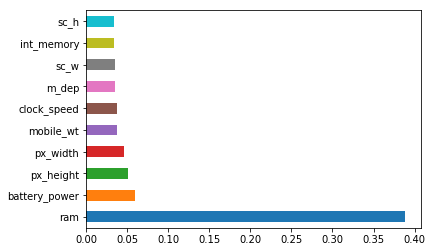

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [49]:
import statsmodels.formula.api as sm

In [51]:
x=np.append(arr=np.ones((2000,1)).astype("int"),values=x,axis=1)

In [63]:
#Removing the value which is having higher p value to make optimal model

x_opt=x[:,[0,1,4,7,9,10,12,13,14,18,20]]
ols=sm.OLS(endog=y,exog=x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2242.
Date:                Tue, 15 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:38:09   Log-Likelihood:                -553.85
No. Observations:                2000   AIC:                             1130.
Df Residuals:                    1989   BIC:                             1191.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5814      0.051    -31.178      0.000      -1.681      -1.482
x1             0.0005   1.63e-05     31.217      0.000       0.000       0.001
x2            -0.0241      0.014     -1.676      0.094      -0.052       0.004
x3             0.0009      0.000      2.179      0.029    8.61e-05       0.002
x4            -0.0009      0.000     -4.368      0.000      -0.001      -0.000
x5             0.0018      0.003      0.568      0.570      -0.004       0.008
x6             0.0003   1.88e-05     14.710      0.000       0.000       0.000
x7             0.0003   1.93e-05     14.495      0.000       0.000       0.000
x8             0.0009   6.61e-06    143.248      0.000       0.001       0.001
x9             0.0270      0.017      1.606      0.108      -0.006       0.060
x10           -0.0206      0.014     -1.437      0.151      -0.049       0.008
==============================================================================
Omnibus:                      116.715   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.214
Skew:                           0.038   Prob(JB):                     2.51e-10
Kurtosis:                       2.276   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
ds.iloc[:,[0,1,4,7,9,10,12,13,14,18,20]]

,battery_power,blue,fc,m_dep,n_cores,pc,px_width,ram,sc_h,touch_screen,price_range
0,842,0,1,0.6,2,2,756,2549,9,0,1
1,1021,1,0,0.7,3,6,1988,2631,17,1,2
2,563,1,2,0.9,5,6,1716,2603,11,1,2
3,615,1,0,0.8,6,9,1786,2769,16,0,2
4,1821,1,13,0.6,2,14,1212,1411,8,1,1
5,1859,0,3,0.7,1,7,1654,1067,17,0,1
6,1821,0,4,0.8,8,10,1018,3220,13,0,3
7,1954,0,0,0.8,4,0,1149,700,16,1,0
8,1445,1,0,0.7,7,14,836,1099,17,0,0
9,509,1,2,0.1,5,15,1224,513,19,0,0
